## Import Neccessary Libraries

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
%matplotlib inline 

## Reading CSV Files 

In [2]:
df=pd.read_csv('honda_car_selling.csv')

In [3]:
df.head()

Year   kms Driven Fuel Type  Suspension        Price  \
0  2019   19006 kms    Petrol    Automatic    9.29 Lakh   
1  2021   11936 kms    Petrol    Automatic   13.95 Lakh   
2  2018   29635 kms    Petrol    Automatic    9.95 Lakh   
3  2020   16163 kms    Petrol    Automatic   13.26 Lakh   
4  2015  105114 kms    Petrol       Manual    5.68 Lakh   

                  Car Model  
0          Honda City V CVT  
1         Honda City ZX CVT  
2  Honda City i-VTEC CVT ZX  
3         Honda City ZX CVT  
4       Honda City i VTEC V

## Data Cleaning 

### Creating a backup file

In [4]:
df_backup = df.copy()

### Info of the dataset

In [5]:
df.shape

(999, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [7]:
df.isnull().sum()

Year          0
kms Driven    0
Fuel Type     0
Suspension    0
Price         0
Car Model     0
dtype: int64

### Cleaning Year Column

In [8]:
df['Year'].unique()

array([2019, 2021, 2018, 2020, 2015, 2016, 2014, 2017, 2022, 2013, 2012,
       2010, 2011, 2008, 2009, 2023, 2007, 2005, 2004, 2003, 2006, 2000],
      dtype=int64)

As, we see Year Column has no Non-Year Values and it is in (int) DataType so It is already Clean

### Cleaning kms Driven Column

In [9]:
df["kms Driven"] = df["kms Driven"].astype(str)

Firstly, we will strip the White Spaces from both the ends from the String

In [10]:
df['kms Driven']=df['kms Driven'].str.strip()

Then, we will Split the String with Space Delimiter and keep the First Numeric Part

In [11]:
df["kms Driven"] = df["kms Driven"].str.split().str.get(0)

And, finally we will convert the kms Driven into (int) DataType

In [12]:
df["kms Driven"] = df["kms Driven"].astype(int)

### Cleaning Fuel Type Column

Here, we can see Extra White Spaces in Fuel Type Column

In [13]:
df['Fuel Type'].unique()

array([' Petrol ', ' Diesel ', ' CNG '], dtype=object)

We will Strip the Extra White Spaces from both ends in Fuel Type Column

In [14]:
df['Fuel Type']=df['Fuel Type'].str.strip()

### Cleaning Suspension Column

Here, we can see Extra White Spaces in Suspension Column

In [15]:
df['Suspension'].unique()

array([' Automatic', ' Manual'], dtype=object)

In [16]:
df['Suspension']=df['Suspension'].str.strip()

### Cleaning Price Column

Firstly, we will Strip the Extra White Spaces from both ends in Price Column

In [17]:
df['Price']=df['Price'].str.strip()

Here, we have created a Function which will convert the Price from (6.35 Lakh to 635000) and store it back to Price Column

In [18]:
def price_cleaner(values):
    output = values.split()
    result = [eval(i) for i in output]
    return np.prod(result)
    
df["Price"] = df["Price"].str.strip()
df["Price"] = df["Price"].str.replace(',','')
df["Price"] = df["Price"].str.replace('Lakh','100000')
df["Price"] = df["Price"].map(price_cleaner)

And, finally we will convert the Price into (int) DataType

In [19]:
df["Price"] = df["Price"].astype(int)

### Cleaning Car Model Column

Firstly, we will Strip the Extra White Spaces from both ends in Car Model Column

In [20]:
df['Car Model']=df['Car Model'].str.strip()

Then, we will Split the String with Space Delimiter and keep the First Three Words

In [21]:
df['Car Model']=df['Car Model'].str.split()

In [22]:
df['Car Model'] = df['Car Model'].astype(str).str.strip('[]').str.replace(',', '').str.replace("'", "").str.strip().str.split().str[:3].str.join(' ')

In [23]:
df.to_csv('Cleaned_Car_Data.csv')

## Data Visualization

### Relationship of Year with Price

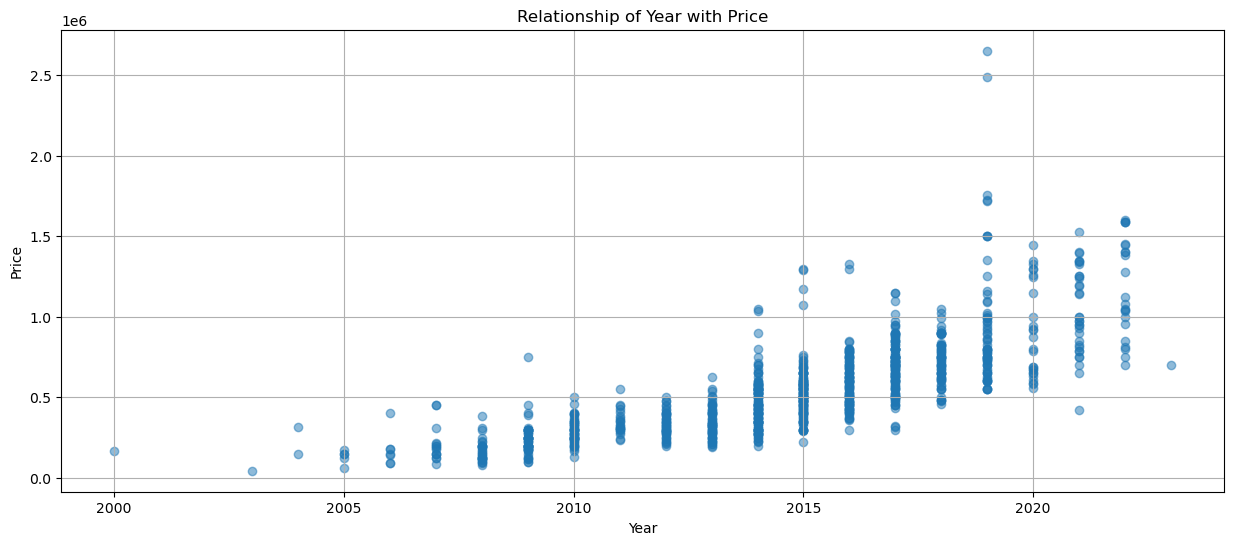

In [24]:
plt.figure(figsize=(15, 6))
plt.scatter(df['Year'], df['Price'], alpha=0.5)
plt.title('Relationship of Year with Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

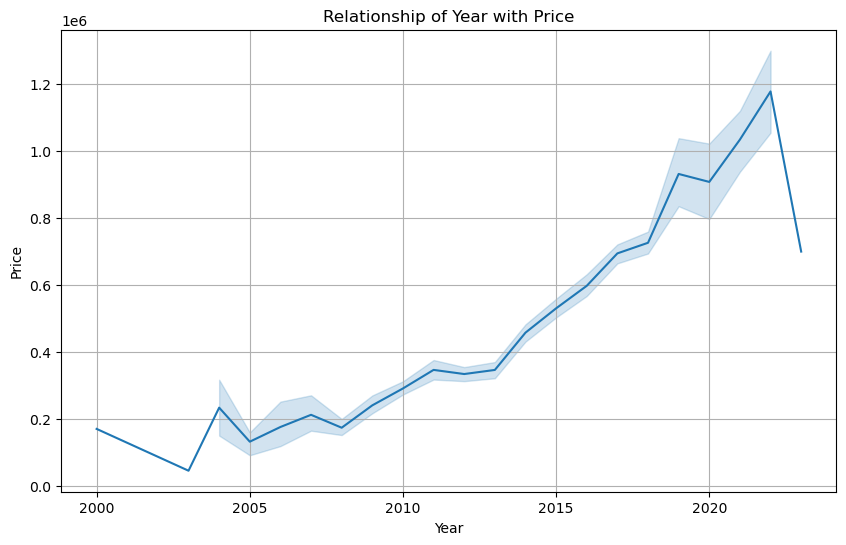

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price', data=df)
plt.title('Relationship of Year with Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Relationship of kms Driven with Price

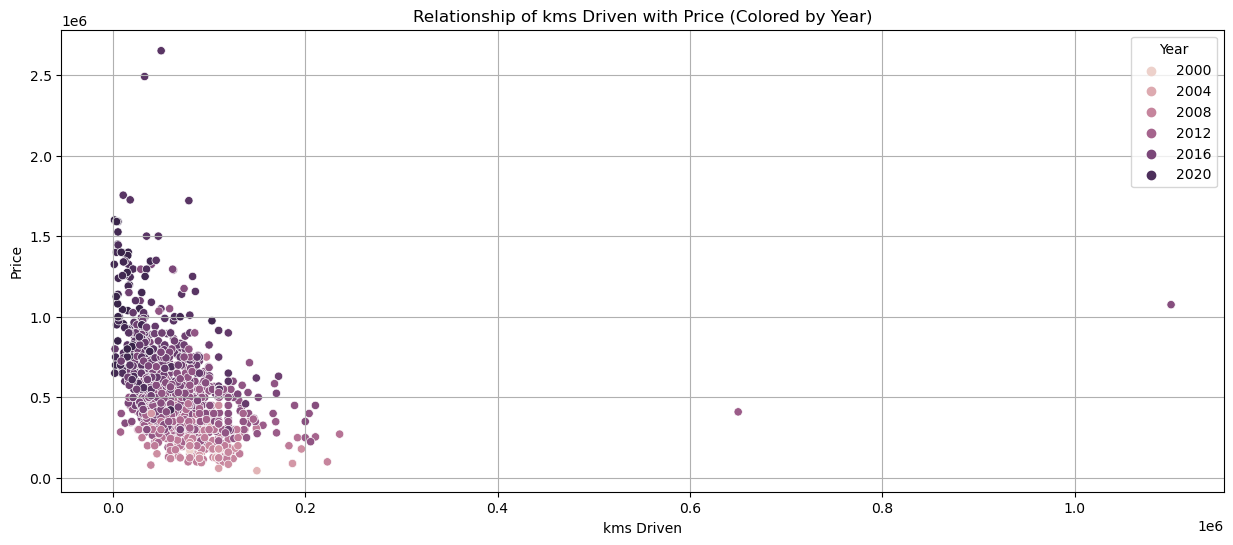

In [26]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='kms Driven', y='Price', hue='Year', data=df)
plt.title('Relationship of kms Driven with Price (Colored by Year)')
plt.xlabel('kms Driven')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Relationship of Price with Car Model, Suspension as Hue

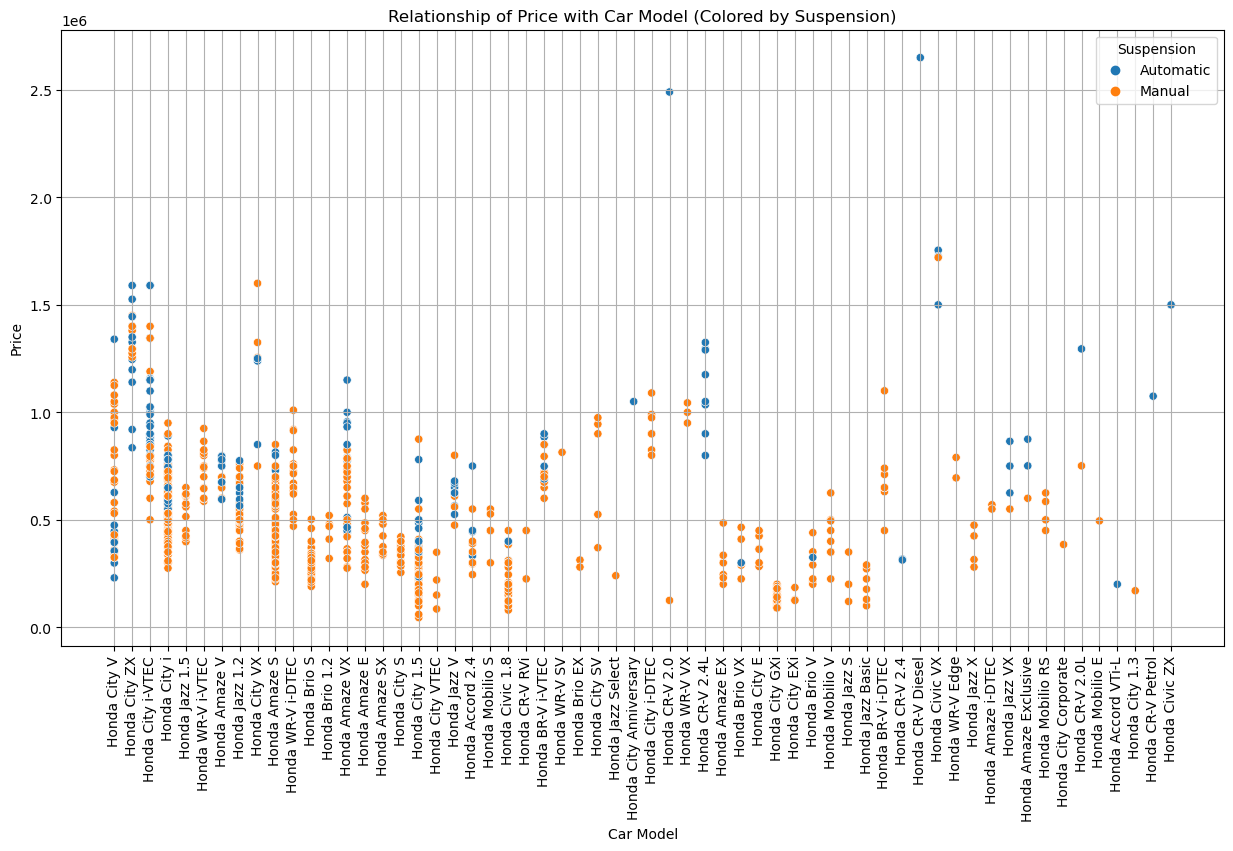

In [27]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Car Model', y='Price', hue='Suspension', data=df)
plt.title('Relationship of Price with Car Model (Colored by Suspension)')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Suspension')
plt.grid(True)
plt.show()

## Dummy Variable

variables such as "Car Model," "Color," or "Suspension Type" are categorical, meaning they represent categories rather than numerical values. However, most regression or machine learning algorithms require numerical inputs. Dummy variables provide a way to represent categorical data as numerical values.

### Creating Dummy Variable for Fuel Type Column

In [28]:
dummies1 = pd.get_dummies(df["Fuel Type"],dtype = "int")

### Converting dummies1 to DataFrame

In [29]:
fuel_dummies = pd.DataFrame(dummies1)
fuel_dummies.head()

CNG  Diesel  Petrol
0    0       0       1
1    0       0       1
2    0       0       1
3    0       0       1
4    0       0       1

### Merging df and fuel_dummies and store it into a New DataFrame

In [30]:
df2 = pd.concat([df,fuel_dummies],axis = "columns")

In [31]:
df2.head(10)

Year  kms Driven Fuel Type Suspension    Price          Car Model  CNG  \
0  2019       19006    Petrol  Automatic   928999       Honda City V    0   
1  2021       11936    Petrol  Automatic  1395000      Honda City ZX    0   
2  2018       29635    Petrol  Automatic   994999  Honda City i-VTEC    0   
3  2020       16163    Petrol  Automatic  1326000      Honda City ZX    0   
4  2015      105114    Petrol     Manual   568000       Honda City i    0   
5  2015      101466    Diesel     Manual   565000       Honda City i    0   
6  2016       52456    Diesel     Manual   560000     Honda Jazz 1.5    0   
7  2014       75247    Diesel     Manual   650000       Honda City i    0   
8  2017       88695    Petrol     Manual   748000  Honda WR-V i-VTEC    0   
9  2019       30906    Petrol  Automatic   797000      Honda Amaze V    0   

   Diesel  Petrol  
0       0       1  
1       0       1  
2       0       1  
3       0       1  
4       0       1  
5       1       0  
6       1       0  
7       1       0  
8       0       1  
9       0       1

### Creating Dummy Variable for Suspension Column

In [32]:
dummies2 = pd.get_dummies(df2["Suspension"],dtype = "int")

### Converting dummies2 to DataFrame

In [33]:
suspension_dummies = pd.DataFrame(dummies2)
suspension_dummies.head(5)

Automatic  Manual
0          1       0
1          1       0
2          1       0
3          1       0
4          0       1

### Merging df2 and suspension_dummies and store it into a New DataFrame

In [34]:
df3 = pd.concat([df2,suspension_dummies],axis = "columns")
df3.head(10)

Year  kms Driven Fuel Type Suspension    Price          Car Model  CNG  \
0  2019       19006    Petrol  Automatic   928999       Honda City V    0   
1  2021       11936    Petrol  Automatic  1395000      Honda City ZX    0   
2  2018       29635    Petrol  Automatic   994999  Honda City i-VTEC    0   
3  2020       16163    Petrol  Automatic  1326000      Honda City ZX    0   
4  2015      105114    Petrol     Manual   568000       Honda City i    0   
5  2015      101466    Diesel     Manual   565000       Honda City i    0   
6  2016       52456    Diesel     Manual   560000     Honda Jazz 1.5    0   
7  2014       75247    Diesel     Manual   650000       Honda City i    0   
8  2017       88695    Petrol     Manual   748000  Honda WR-V i-VTEC    0   
9  2019       30906    Petrol  Automatic   797000      Honda Amaze V    0   

   Diesel  Petrol  Automatic  Manual  
0       0       1          1       0  
1       0       1          1       0  
2       0       1          1       0  
3       0       1          1       0  
4       0       1          0       1  
5       1       0          0       1  
6       1       0          0       1  
7       1       0          0       1  
8       0       1          0       1  
9       0       1          1       0

### Creating Dummy Variable for Car Model Column

In [35]:
dummies3 = pd.get_dummies(df3['Car Model'],dtype='int')

### Converting dummies3 to DataFrame

In [36]:
car_dummies = pd.DataFrame(dummies3)
car_dummies.head()

Honda Accord 2.4  Honda Accord VTi-L  Honda Amaze E  Honda Amaze EX  \
0                 0                   0              0               0   
1                 0                   0              0               0   
2                 0                   0              0               0   
3                 0                   0              0               0   
4                 0                   0              0               0   

   Honda Amaze Exclusive  Honda Amaze S  Honda Amaze SX  Honda Amaze V  \
0                      0              0               0              0   
1                      0              0               0              0   
2                      0              0               0              0   
3                      0              0               0              0   
4                      0              0               0              0   

   Honda Amaze VX  Honda Amaze i-DTEC  ...  Honda Jazz X  Honda Mobilio E  \
0               0                   0  ...             0                0   
1               0                   0  ...             0                0   
2               0                   0  ...             0                0   
3               0                   0  ...             0                0   
4               0                   0  ...             0                0   

   Honda Mobilio RS  Honda Mobilio S  Honda Mobilio V  Honda WR-V Edge  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   

   Honda WR-V SV  Honda WR-V VX  Honda WR-V i-DTEC  Honda WR-V i-VTEC  
0              0              0                  0                  0  
1              0              0                  0                  0  
2              0              0                  0                  0  
3              0              0                  0                  0  
4              0              0                  0                  0  

[5 rows x 60 columns]

### Merging df3 and car_dummies and store it into a New DataFrame

In [37]:
df4=pd.concat([df3,car_dummies],axis='columns')
df4.head()

Year  kms Driven Fuel Type Suspension    Price          Car Model  CNG  \
0  2019       19006    Petrol  Automatic   928999       Honda City V    0   
1  2021       11936    Petrol  Automatic  1395000      Honda City ZX    0   
2  2018       29635    Petrol  Automatic   994999  Honda City i-VTEC    0   
3  2020       16163    Petrol  Automatic  1326000      Honda City ZX    0   
4  2015      105114    Petrol     Manual   568000       Honda City i    0   

   Diesel  Petrol  Automatic  ...  Honda Jazz X  Honda Mobilio E  \
0       0       1          1  ...             0                0   
1       0       1          1  ...             0                0   
2       0       1          1  ...             0                0   
3       0       1          1  ...             0                0   
4       0       1          0  ...             0                0   

   Honda Mobilio RS  Honda Mobilio S  Honda Mobilio V  Honda WR-V Edge  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   

   Honda WR-V SV  Honda WR-V VX  Honda WR-V i-DTEC  Honda WR-V i-VTEC  
0              0              0                  0                  0  
1              0              0                  0                  0  
2              0              0                  0                  0  
3              0              0                  0                  0  
4              0              0                  0                  0  

[5 rows x 71 columns]

### Dropping Fuel Type, Suspension, Car Model Columns after Converting it into Dummies

In [38]:
df5 = df4.drop(["Fuel Type","Suspension","Car Model"],axis = "columns")
df5.head()

Year  kms Driven    Price  CNG  Diesel  Petrol  Automatic  Manual  \
0  2019       19006   928999    0       0       1          1       0   
1  2021       11936  1395000    0       0       1          1       0   
2  2018       29635   994999    0       0       1          1       0   
3  2020       16163  1326000    0       0       1          1       0   
4  2015      105114   568000    0       0       1          0       1   

   Honda Accord 2.4  Honda Accord VTi-L  ...  Honda Jazz X  Honda Mobilio E  \
0                 0                   0  ...             0                0   
1                 0                   0  ...             0                0   
2                 0                   0  ...             0                0   
3                 0                   0  ...             0                0   
4                 0                   0  ...             0                0   

   Honda Mobilio RS  Honda Mobilio S  Honda Mobilio V  Honda WR-V Edge  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   

   Honda WR-V SV  Honda WR-V VX  Honda WR-V i-DTEC  Honda WR-V i-VTEC  
0              0              0                  0                  0  
1              0              0                  0                  0  
2              0              0                  0                  0  
3              0              0                  0                  0  
4              0              0                  0                  0  

[5 rows x 68 columns]

## Outlier Removal

### Describing the Dataset

Here, we can see our 75% of Cars has driven 85000 kms and our Maximum Value in kms Driven is 11 Lakh kms which is an Outlier

Here, we can see our 75% of Cars has Price 7 Lakh and our Maximum Price is 26 Lakh which is an Outlier

In [39]:
df5.describe()

Year    kms Driven         Price         CNG      Diesel  \
count   999.000000  9.990000e+02  9.990000e+02  999.000000  999.000000   
mean   2014.717718  6.607667e+04  5.530370e+05    0.001001    0.201201   
std       3.713756  5.310468e+04  3.030851e+05    0.031639    0.401099   
min    2000.000000  1.425000e+03  4.500000e+04    0.000000    0.000000   
25%    2013.000000  3.534100e+04  3.265000e+05    0.000000    0.000000   
50%    2015.000000  5.990000e+04  5.099990e+05    0.000000    0.000000   
75%    2017.000000  8.528750e+04  7.000000e+05    0.000000    0.000000   
max    2023.000000  1.100000e+06  2.650000e+06    1.000000    1.000000   

           Petrol   Automatic      Manual  Honda Accord 2.4  \
count  999.000000  999.000000  999.000000        999.000000   
mean     0.797798    0.223223    0.776777          0.013013   
std      0.401843    0.416615    0.416615          0.113387   
min      0.000000    0.000000    0.000000          0.000000   
25%      1.000000    0.000000    1.000000          0.000000   
50%      1.000000    0.000000    1.000000          0.000000   
75%      1.000000    0.000000    1.000000          0.000000   
max      1.000000    1.000000    1.000000          1.000000   

       Honda Accord VTi-L  ...  Honda Jazz X  Honda Mobilio E  \
count          999.000000  ...    999.000000       999.000000   
mean             0.001001  ...      0.004004         0.001001   
std              0.031639  ...      0.063182         0.031639   
min              0.000000  ...      0.000000         0.000000   
25%              0.000000  ...      0.000000         0.000000   
50%              0.000000  ...      0.000000         0.000000   
75%              0.000000  ...      0.000000         0.000000   
max              1.000000  ...      1.000000         1.000000   

       Honda Mobilio RS  Honda Mobilio S  Honda Mobilio V  Honda WR-V Edge  \
count        999.000000       999.000000       999.000000       999.000000   
mean           0.004004         0.005005         0.009009         0.002002   
std            0.063182         0.070604         0.094535         0.044721   
min            0.000000         0.000000         0.000000         0.000000   
25%            0.000000         0.000000         0.000000         0.000000   
50%            0.000000         0.000000         0.000000         0.000000   
75%            0.000000         0.000000         0.000000         0.000000   
max            1.000000         1.000000         1.000000         1.000000   

       Honda WR-V SV  Honda WR-V VX  Honda WR-V i-DTEC  Honda WR-V i-VTEC  
count     999.000000     999.000000         999.000000         999.000000  
mean        0.001001       0.003003           0.019019           0.018018  
std         0.031639       0.054745           0.136660           0.133083  
min         0.000000       0.000000           0.000000           0.000000  
25%         0.000000       0.000000           0.000000           0.000000  
50%         0.000000       0.000000           0.000000           0.000000  
75%         0.000000       0.000000           0.000000           0.000000  
max         1.000000       1.000000           1.000000           1.000000  

[8 rows x 68 columns]

So we will filter all the Cars with kms Driven less than 1.5 Lakh kms for best possible Result

In [40]:
df5 = df5[df5["kms Driven"]<150000]

So we will filter all the Cars with Price less than 10 Lakh for best possible Result

In [41]:
df5 = df5[df5["Price"]<1000000]

## Model Building

### Defining Dependent and Independent Variables

In [42]:
X = df5.drop(["Price"],axis = "columns") #Independent variables are the variables used to predict or explain the dependent variable, denoted as "X".
y = df5.Price # The dependent variable is the variable you want to predict or explain, denoted as "Y"

### Train Test Split

the train-test split is a critical step in machine learning model development. It allows you to train the model on a portion of the data and evaluate its performance on unseen data, providing insights into how well the model generalizes to new examples.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

X and y are the feature matrix and target vector, respectively.

X contains the independent variables or features used to predict the target variable y.
y contains the dependent variable or target variable to be predicted.
train_test_split is a function from scikit-lded) that splits the dataset into training and testing sets.

test_size=0.33 specifies the proportion of the dataset to include in the testing set. Here, it's set to 0.33, meaning 33% of the data will be used for testing, and the remaining 67% will be used for training.

random_state=10 is used to ensure reproducibility of the split. It sets a seed for the random number generator used by the train-test split algorithm. Providing a specific value for random_state ensures that the split will be the same every time you run the code, which can be helpful for reproducibility and debugging purposes.

### Importing LinearRegression Model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

### Fitting the Model

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

### Score of the Model

In [48]:
lr.score(X_test,y_test)

0.8211897942752131

### Importing KFold for measuring Model Accuracy

In [49]:
from sklearn.model_selection import KFold

KFold is a technique used to evaluate the performance of a machine learning model by partitioning the dataset into k subsets (or folds) of approximately equal size.
The model is trained and evaluated k times, where each time it is trained on k-1 folds and tested on the remaining fold.
This process ensures that each data point is used for testing exactly once and allows for a more robust estimation of the model's performance than a single train-test split.

In [50]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

### Importing CrossValScore for Best Score

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
cross_val = cross_val_score(LinearRegression(),X,y)

### Mean of CrossValScore

In [53]:
cross_val.mean()

0.8335835128647922

### Predicting the Output

In [54]:
y_predicted = lr.predict(X_test)